In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.linalg import solve
from scipy.optimize import bisect, minimize_scalar

**Problem 6.1.1**

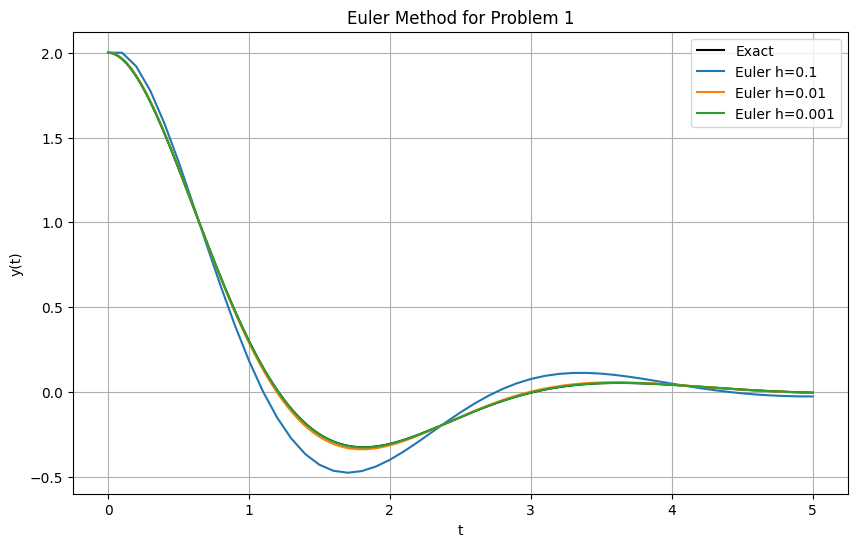

In [ ]:
def euler_system(f, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    h = t[1] - t[0]
    for i in range(len(t)-1):
        y[i+1] = y[i] + h * f(t[i], y[i])
    return y

def f1(t, Y):
    y, v = Y
    return np.array([v, -2*v - 4*y])

def y_exact(t):
    return 2*np.exp(-t)*(np.cos(np.sqrt(3)*t) + (1/np.sqrt(3))*np.sin(np.sqrt(3)*t))

hs = [0.1, 0.01, 0.001]
t_analytic = np.linspace(0, 5, 2000)

plt.figure(figsize=(10,6))
plt.plot(t_analytic, y_exact(t_analytic), 'k', label='Exact')

for h in hs:
    t = np.arange(0, 5+h, h)
    Y = euler_system(f1, [2, 0], t)
    plt.plot(t, Y[:,0], label=f'Euler h={h}')

plt.legend()
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Euler Method for Problem 1")
plt.grid()
plt.show()

**Problem 6.1.2**

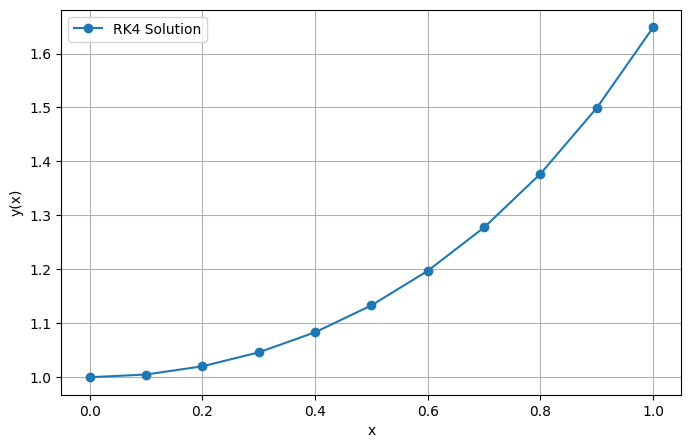

In [29]:
def rk4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h/2, y + h*k1/2)
    k3 = f(t + h/2, y + h*k2/2)
    k4 = f(t + h, y + h*k3)
    return y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

def rk4_solve(f, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    h = t[1] - t[0]
    for i in range(len(t)-1):
        y[i+1] = rk4_step(f, t[i], y[i], h)
    return y

def f2(x, Y):
    y, v = Y
    return np.array([v, (1+x**2)*y])

t = np.arange(0, 1.01, 0.1)
Y = rk4_solve(f2, [1, 0], t)

plt.figure(figsize=(8,5))
plt.plot(t, Y[:,0], 'o-', label='RK4 Solution')
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid()
plt.legend()
plt.show()

**Problem 6.1.3**

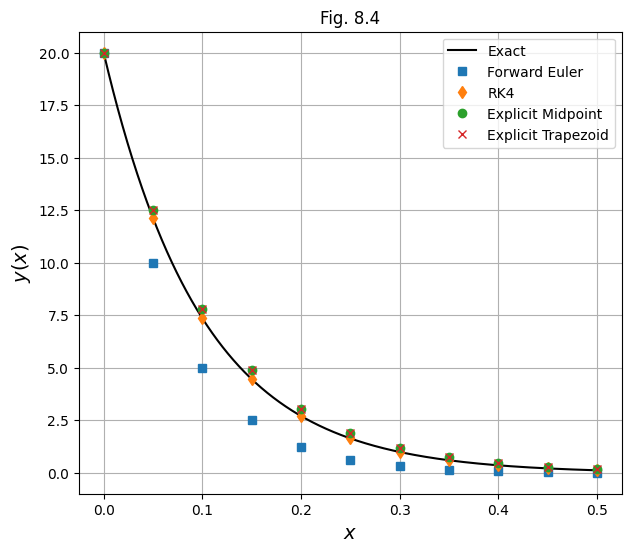

In [30]:
def f(x, y):
    return -10*y - x**2

y0 = 20
x_start, x_end = 0, 0.5
h = 0.05
x = np.arange(x_start, x_end + h, h)

x_dense = np.linspace(x_start, x_end, 2000)
sol_exact = solve_ivp(f, [x_start, x_end], [y0], t_eval=x_dense, rtol=1e-12, atol=1e-12)
y_exact = sol_exact.y[0]

y_euler = np.zeros_like(x)
y_euler[0] = y0
for i in range(len(x) - 1):
    y_euler[i+1] = y_euler[i] + h*f(x[i], y_euler[i])

y_mid = np.zeros_like(x)
y_mid[0] = y0
for i in range(len(x) - 1):
    k1 = f(x[i], y_mid[i])
    k2 = f(x[i] + h/2, y_mid[i] + h*k1/2)
    y_mid[i+1] = y_mid[i] + h*k2

y_trap = np.zeros_like(x)
y_trap[0] = y0
for i in range(len(x)-1):
    k1 = f(x[i], y_trap[i])
    y_pred = y_trap[i] + h*k1
    k2 = f(x[i+1], y_pred)
    y_trap[i+1] = y_trap[i] + h*(k1 + k2)/2

y_rk4 = np.zeros_like(x)
y_rk4[0] = y0
for i in range(len(x) - 1):
    k1 = f(x[i], y_rk4[i])
    k2 = f(x[i] + h/2, y_rk4[i] + h*k1/2)
    k3 = f(x[i] + h/2, y_rk4[i] + h*k2/2)
    k4 = f(x[i] + h, y_rk4[i] + h*k3)
    y_rk4[i+1] = y_rk4[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

plt.figure(figsize=(7,6))
plt.plot(x_dense, y_exact, 'k-', label='Exact')

plt.plot(x, y_euler, 's', label='Forward Euler')
plt.plot(x, y_rk4, 'd', label='RK4')
plt.plot(x, y_mid, 'o', label='Explicit Midpoint')
plt.plot(x, y_trap, 'x', label='Explicit Trapezoid')

plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y(x)$', fontsize=14)
plt.title("Fig. 8.4")
plt.grid(True)
plt.legend()
plt.show()

**Problem 6.1.4**

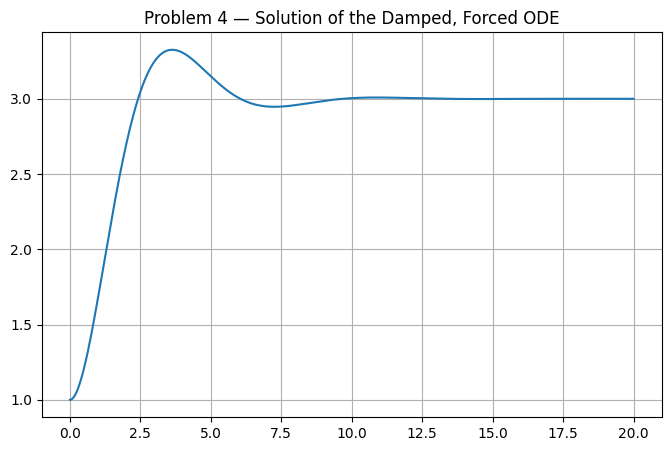

In [31]:
b=0.5; k=3

def f4(t,Y):
    y,v = Y
    return [v, -2*b*v - y + k]

t = np.linspace(0,20,500)
sol = solve_ivp(f4,[0,20],[1,0],t_eval=t)

plt.figure(figsize=(8,5))
plt.plot(sol.t, sol.y[0])
plt.title("Problem 4 — Solution of the Damped, Forced ODE")
plt.grid()
plt.show()

**Problem 6.1.5**

In [32]:
def f5(x, Y):
    y, v = Y
    return [v, (1/18)*(32 + 2*x**3 - 4*v)]

def shoot(s):
    sol = solve_ivp(
        f5,
        [1, 3],
        [17, s],
        t_eval=[3],
        max_step=0.01,
        rtol=1e-8,
        atol=1e-10
    )
    return sol.y[0, -1] - 43/3

In [ ]:
s_left = -1.0
s_right = 1.0
f_left = shoot(s_left)
f_right = shoot(s_right)

for k in range(30):
    if f_left * f_right < 0:
        break
    s_left -= 2
    s_right += 2
    f_left = shoot(s_left)
    f_right = shoot(s_right)

print("Bracket found:", s_left, s_right)
print("Signs:", f_left, f_right)

s_correct = bisect(shoot, s_left, s_right, xtol=1e-10)
print("Correct slope:", s_correct)

Bracket found: -5.0 5.0
Signs: -1.1593894394093827 14.987493081242642
Correct slope: -4.281973199467757


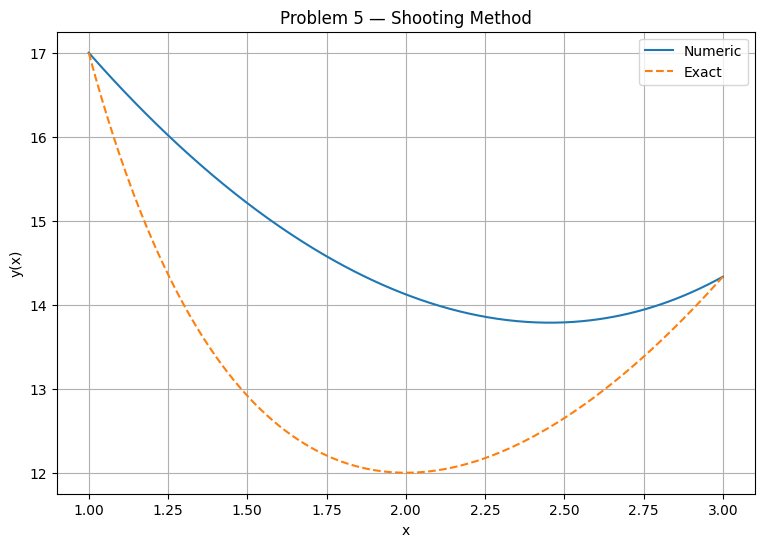

In [34]:
x_plot = np.linspace(1, 3, 400)

sol = solve_ivp(
    f5,
    [1, 3],
    [17, s_correct],
    t_eval=x_plot,
    max_step=0.01,
    rtol=1e-9,
    atol=1e-12
)

y_num = sol.y[0]
y_exact = x_plot**2 + 16/x_plot

plt.figure(figsize=(9,6))
plt.plot(x_plot, y_num, label="Numeric")
plt.plot(x_plot, y_exact, '--', label="Exact")
plt.grid()
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Problem 5 — Shooting Method")
plt.legend()
plt.show()

**Problem 6.1.6**

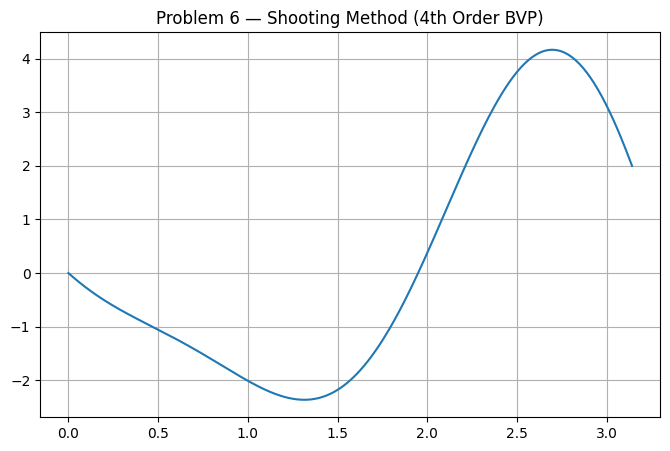

In [ ]:
def f6(x,Y):
    w, wp, wpp, wppp = Y
    return [wp, wpp, wppp, -13*wpp - 36*w]

def residual(ab):
    a,b = ab
    sol = solve_ivp(f6,[0,np.pi],[0,-3,a,b])
    wpi = sol.y[0,-1]
    wppi = sol.y[1,-1]
    return np.array([wpi-2, wppi+9])

ab = np.array([0.0, 0.0])
for _ in range(12):
    r = residual(ab)
    eps = 1e-6
    J = np.zeros((2,2))
    for i in range(2):
        da = np.zeros(2); da[i]=eps
        J[:,i] = (residual(ab+da)-r)/eps
    ab = ab - solve(J,r)

a,b = ab
sol = solve_ivp(f6,[0,np.pi],[0,-3,a,b],t_eval=np.linspace(0,np.pi,300))

plt.figure(figsize=(8,5))
plt.plot(sol.t, sol.y[0])
plt.grid()
plt.title("Problem 6 — Shooting Method (4th Order BVP)")
plt.show()

**Problem 6.1.7**

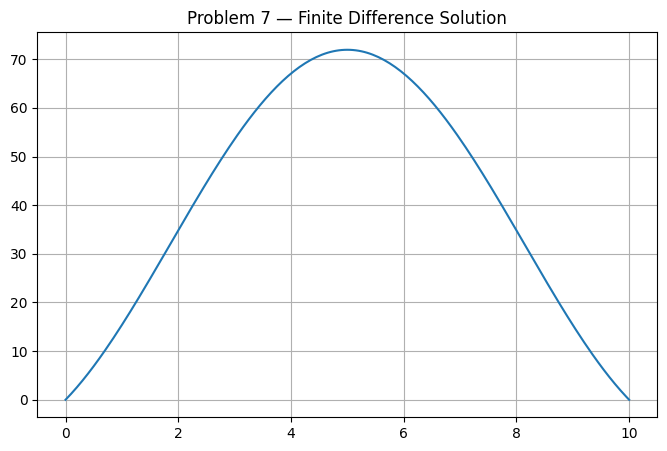

In [36]:
N=200
a=0; b=10
x=np.linspace(a,b,N+1)
h=(b-a)/N

A=np.zeros((N-1,N-1))
rhs = np.full(N-1, 8)

for i in range(N-1):
    A[i,i] = -2/h**2 + 1/4
    if i>0: A[i,i-1] = 1/h**2
    if i<N-2: A[i,i+1] = 1/h**2

y_inner = solve(A,rhs)
y = np.zeros(N+1)
y[1:-1] = y_inner

plt.figure(figsize=(8,5))
plt.plot(x,y)
plt.title("Problem 7 — Finite Difference Solution")
plt.grid()
plt.show()

**Problem 6.1.8**

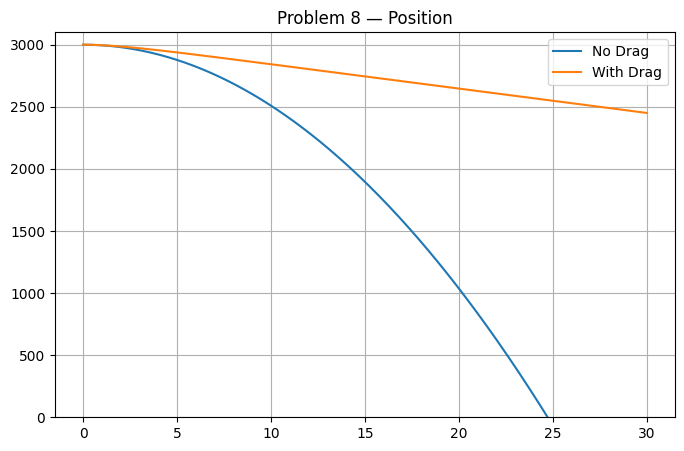

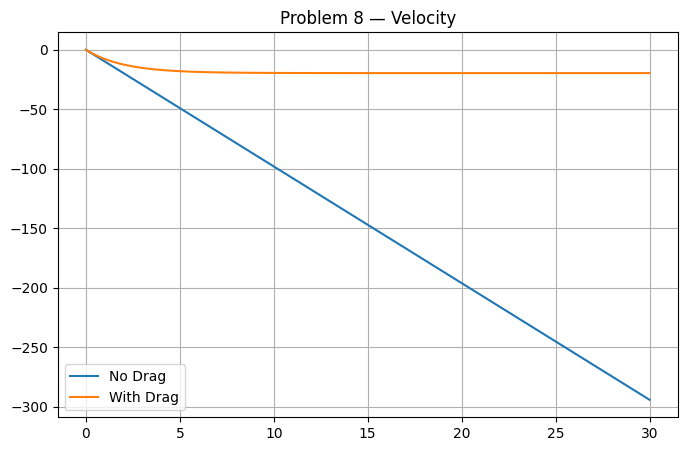

In [37]:
g=9.81
alpha = 0.5

def f_no_drag(t,Y):
    y,v = Y
    return [v, -g]

def f_drag(t,Y):
    y,v = Y
    return [v, -g - alpha*v]

t=np.linspace(0,30,400)

sol1=solve_ivp(f_no_drag,[0,30],[3000,0],t_eval=t)
sol2=solve_ivp(f_drag,[0,30],[3000,0],t_eval=t)

plt.figure(figsize=(8,5))
plt.plot(sol1.t, sol1.y[0], label="No Drag")
plt.plot(sol2.t, sol2.y[0], label="With Drag")
plt.ylim(0,3100); plt.legend(); plt.grid()
plt.title("Problem 8 — Position")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(sol1.t, sol1.y[1], label="No Drag")
plt.plot(sol2.t, sol2.y[1], label="With Drag")
plt.legend(); plt.grid()
plt.title("Problem 8 — Velocity")
plt.show()

**Problem 6.1.9**

In [ ]:
a = 0.5

def sch_eq(x, Y, E):
    psi, phi = Y
    return [phi, -E * psi]

def shoot(E, parity):
    if parity == "even":
        y0 = [1.0, 0.0]
    else:
        y0 = [0.0, 1.0]

    sol = solve_ivp(lambda x, Y: sch_eq(x, Y, E),
                    [0, a], y0,
                    t_eval=[a],
                    rtol=1e-10, atol=1e-12, max_step=0.01)
    
    return sol.y[0, -1]

In [ ]:
def find_level(n):
    parity = "even" if n % 2 == 1 else "odd"

    E_guess = (np.pi*n/(2*a))**2

    E1 = E_guess * 0.5
    E2 = E_guess * 1.5

    f1 = shoot(E1, parity)
    f2 = shoot(E2, parity)
    while f1*f2 > 0:
        E1 *= 0.8
        E2 *= 1.2
        f1 = shoot(E1, parity)
        f2 = shoot(E2, parity)

    E = bisect(lambda E: shoot(E, parity), E1, E2, xtol=1e-10)
    return E

Es = [find_level(n) for n in range(1,7)]
Es

[9.869604401017547,
 39.47841760428562,
 88.82643960972345,
 157.9136704172143,
 246.74011002684122,
 355.3057584386514]

**Problem 6.1.10**

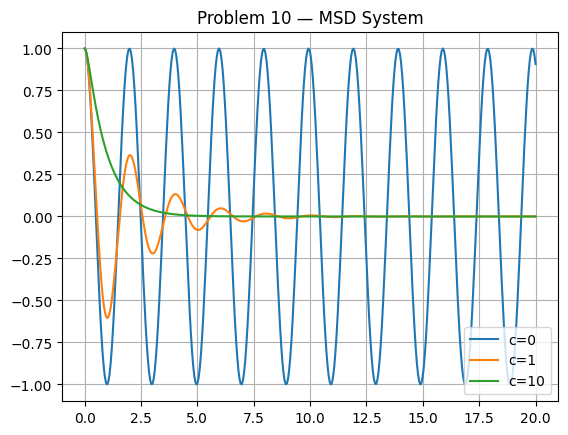

In [40]:
m=1; k=10

def msd(t,Y,c):
    x,v = Y
    return [v, -(c/m)*v - (k/m)*x]

t = np.linspace(0,20,400)

for c in [0,1,10]:
    sol = solve_ivp(lambda t,Y:msd(t,Y,c),[0,20],[1,0],t_eval=t)
    plt.plot(sol.t, sol.y[0], label=f"c={c}")

plt.legend()
plt.grid()
plt.title("Problem 10 — MSD System")
plt.show()